<Axes: xlabel='DATE'>

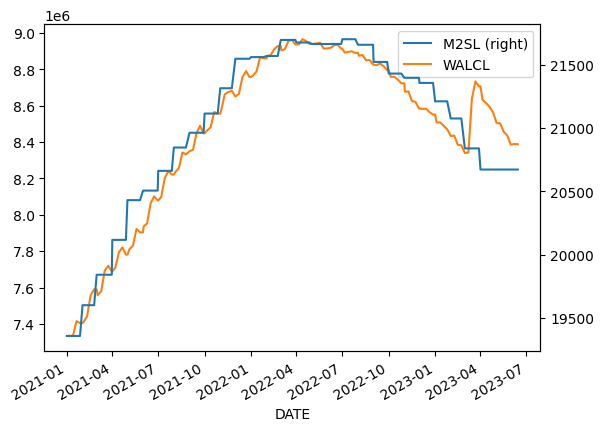

In [1]:
#유동성지표
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

data=fdr.DataReader('FRED:WALCL,M2SL',start='2021-01-01')
data.plot(secondary_y='M2SL')

In [2]:
data

,M2SL,WALCL
DATE,,
2021-01-01,19356.8,NaN
2021-01-06,19356.8,7334809.0
2021-01-13,19356.8,7333968.0
2021-01-20,19356.8,7414942.0
2021-01-27,19356.8,7404926.0
...,...,...
2023-05-17,20673.1,8456760.0
2023-05-24,20673.1,8436255.0
2023-05-31,20673.1,8385854.0


WALCL :연준의 자산
, M2SL :시중에 풀려있는돈 이라고 생각하시면 됩니다. 

SVB 파산 이후 유동성을 쫙 풀었다가 다시 23년 1월 수준으로 복귀했습니다. 연준은 아직 긴축하고 있습니다.

<Axes: xlabel='DATE'>

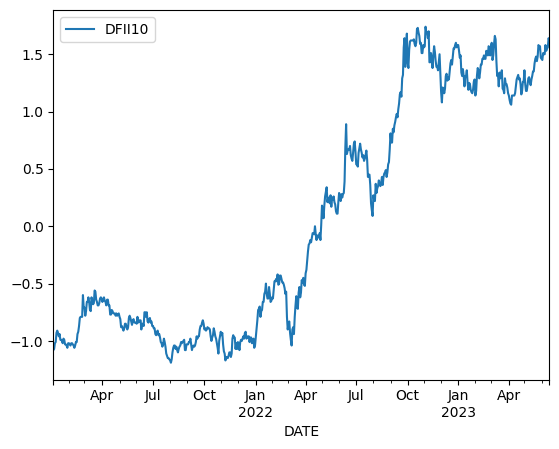

In [3]:
data=fdr.DataReader('FRED:DFII10', start='2021-01-01')
data.plot()

In [8]:
data['2023']

C:\Users\pc\AppData\Local\Temp\ipykernel_8760\1503388216.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2023']


,DFII10
DATE,
2023-01-02,1.58
2023-01-03,1.53
2023-01-04,1.47
2023-01-05,1.49
2023-01-06,1.34
...,...
2023-06-08,1.53
2023-06-09,1.55
2023-06-12,1.56


10년물 국채와 10년 TIPS(물가연동국채) 수익률 스프레드입니다. 인플레이션이 상승할 것이라고 생각하는 경우 TIPS의 가격이 높아져(수익률감소) 스프레드가 증가합니다.

<Axes: xlabel='DATE'>

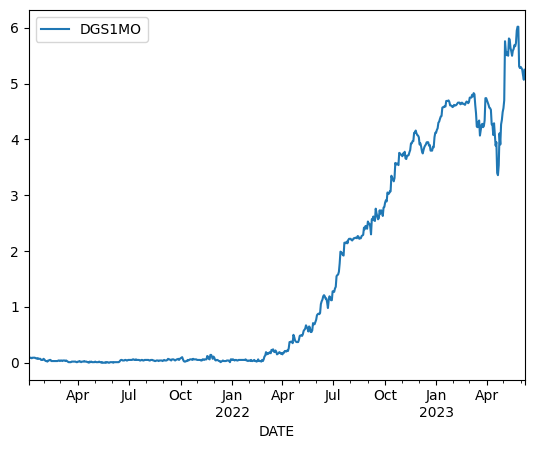

In [6]:
data=fdr.DataReader('FRED:DGS1MO',start='2021-01-01')
data.plot()

미국 1개월 국채 수익률입니다. 한 때 미국의 디폴트 우려로 크게 하락했지만 다시 복귀하는 모습입니다.

<Axes: xlabel='DATE'>

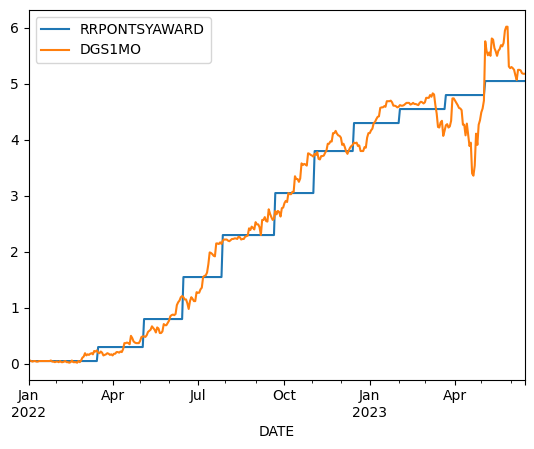

In [13]:
data=fdr.DataReader('FRED:RRPONTSYAWARD,DGS1MO',start='2022-01-01')
data.plot(secondary_y='DFF')

In [9]:
data['2023']

C:\Users\pc\AppData\Local\Temp\ipykernel_12840\1503388216.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2023']


,RRPONTSYAWARD,DGS1MO
DATE,,
2023-01-02,4.30,4.12
2023-01-03,4.30,4.17
2023-01-04,4.30,4.20
2023-01-05,4.30,4.30
2023-01-06,4.30,4.32
...,...,...
2023-06-09,5.05,5.25
2023-06-12,5.05,5.24
2023-06-13,5.05,5.19


역레포 금리와 미국 1개월 국채 수익률 비교입니다. 역레포 금리가 상승하고 시장의 자금이 채권으로 흘러들어가 미 국채 수익률 보다 역레포 금리가 위에 있다면 금융기관은 더 많은 돈을 연준에 맡기게 됩니다. 이에따라 연준의 긴축 속도가 빨라지게 됩니다. 아직은 국채 수익률이 우위에 있습니다.

이것이 역전될 경우 시장이 하락 or 조정 될 수 있습니다

In [49]:
data=fdr.DataReader('FRED:WALCL',start='2020-01-01') 
data2=fdr.DataReader('FRED:WDTGAL',start='2020-01-01') 
data3=fdr.DataReader('FRED:WLRRAL',start='2020-01-01') 
snp=fdr.DataReader('yfinance:^GSPC',start='2020-01-01')

In [68]:
liq=data['WALCL']-data2['WDTGAL']-data3['WLRRAL']
snp=snp.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [110]:
pd.DataFrame(liq)

,0
DATE,
2020-01-01,3433124.0
2020-01-08,3523781.0
2020-01-15,3534135.0
2020-01-22,3468847.0
2020-01-29,3467689.0
...,...
2023-05-17,5789801.0
2023-05-24,5775776.0
2023-05-31,5721665.0


연준의 자산 - 역레포 잔고 - TGA 잔고 입니다. 본원통화 + 연준기타자산을 의미하며 증가하면 유동성 확대로 해석할 수 있습니다.

<Axes: xlabel='DATE'>

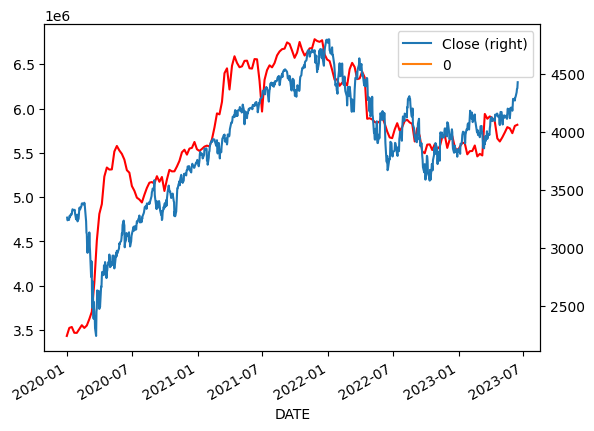

In [99]:
liqsnp.plot(secondary_y='Close')
liq.plot(color='r')

최근 시장은 정부의 유동성 정책에 따른 움직임을 보여줍니다. 이를 통해 방향성을 확인해 볼 수 있습니다